In [33]:
!rm -f libspeechr.so
!cd .. && make clean && make install

rm -rf ./build
rm -f ./build/libspeechr.so
rm -f ./build/test
gcc -Wall -Wextra -pedantic -Wdouble-promotion -fPIC -c src/dtw.c -o build/dtw.c.o
gcc -Wall -Wextra -pedantic -Wdouble-promotion -fPIC -c src/fcomplex.c -o build/fcomplex.c.o
gcc -Wall -Wextra -pedantic -Wdouble-promotion -fPIC -c src/features.c -o build/features.c.o
gcc -Wall -Wextra -pedantic -Wdouble-promotion -fPIC -c src/filters.c -o build/filters.c.o
gcc -Wall -Wextra -pedantic -Wdouble-promotion -fPIC -c src/io.c -o build/io.c.o
gcc -Wall -Wextra -pedantic -Wdouble-promotion -fPIC -c src/main.c -o build/main.c.o
gcc -Wall -Wextra -pedantic -Wdouble-promotion -fPIC -c src/matrix.c -o build/matrix.c.o
gcc -Wall -Wextra -pedantic -Wdouble-promotion -fPIC -c src/transforms.c -o build/transforms.c.o
nasm -f elf64 -F DWARF -Wall src/fcomplex.asm -o build/fcomplex.asm.o
nasm -f elf64 -F DWARF -Wall src/transforms.asm -o build/transforms.asm.o
nasm -f elf64 -F DWARF -Wall src/vector.asm -o build/vector.asm.o
gcc -Wall -Wextr

In [34]:
from numpy.ctypeslib import *
from speechrlib import *
import wave
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)

In [35]:
sample_names = ['four0', 'two0', 'four1', 'two1']
audio_list = []
samplerate = 16000
for i in range(0,len(sample_names)):
    audio = wave.open("../data/samples/" + sample_names[i] + ".wav")
    length = audio.getnframes()
    audio_list.append(np.frombuffer(audio.readframes(length), dtype=np.int16).astype(c_float))

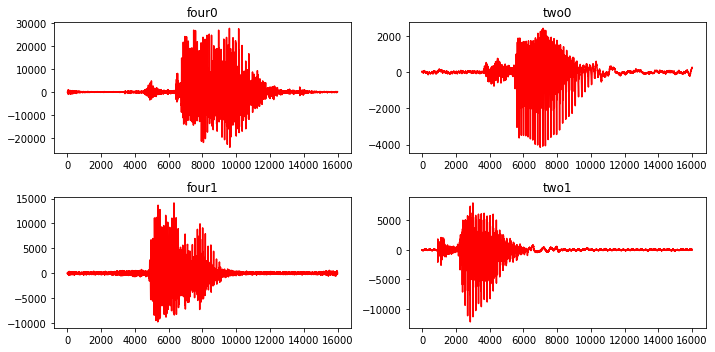

In [36]:
fig = plt.figure()
for i in range(0,4):
    fig.add_subplot(2,2,i+1)
    plt.plot(audio_list[i], c='red')
    plt.title(sample_names[i])
fig.tight_layout()

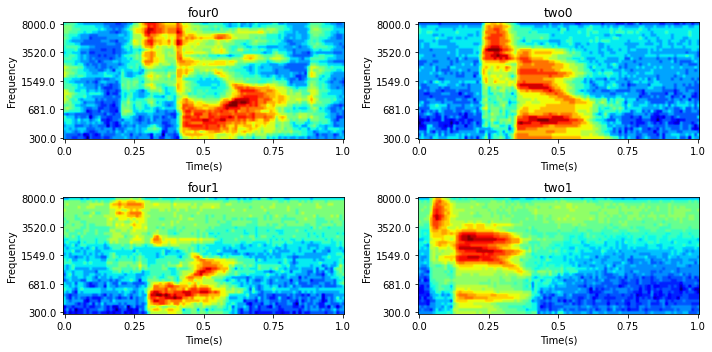

In [37]:
fig = plt.figure()
for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    spectrogram_matrix = speechr.melspectrogram(audio_list[i].ctypes.data_as(c_float_p), len(audio_list[i]), samplerate).contents
    rows = spectrogram_matrix.rows
    cols = spectrogram_matrix.cols
    data = as_array(spectrogram_matrix.data,[rows*cols]).reshape(rows,cols)
    ax.imshow(data.T, origin='lower', cmap='jet', aspect='auto')
    plt.xticks(np.linspace(0, data.shape[0]-1, num=5), np.linspace(0, 1, num=5))
    plt.yticks(np.linspace(0, data.shape[1]-1, num=5),np.trunc(np.logspace(np.log2(300),np.log2(8000), base=2, num=5)))
    plt.title(sample_names[i])
    plt.xlabel("Time(s)");
    plt.ylabel("Frequency");
fig.tight_layout()

In [38]:
feature_matrix_list = []
for i in range(0, len(audio_list)):
    mfcc_matrix = speechr.mfcc(audio_list[i].ctypes.data_as(c_float_p), len(audio_list[i]), samplerate).contents
    rows = mfcc_matrix.rows
    cols = mfcc_matrix.cols
    feature_matrix_list.append(as_array(mfcc_matrix.data,[rows*cols]).reshape(rows,cols))

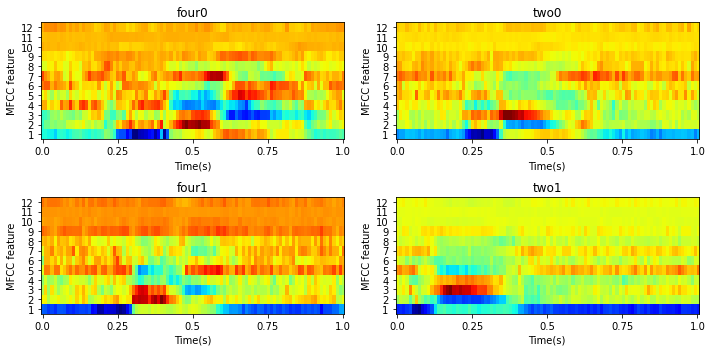

In [39]:
fig = plt.figure()
for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1)
    data = feature_matrix_list[i]
    ax.imshow(data.T, origin='lower', cmap='jet', aspect='auto')
    plt.xticks(np.linspace(0, data.shape[0]-1, num=5), np.linspace(0, 1, num=5))
    plt.yticks(np.arange(0,12,1), np.arange(1,13,1))
    plt.title(sample_names[i])
    plt.xlabel("Time(s)");
    plt.ylabel("MFCC feature");
fig.tight_layout()

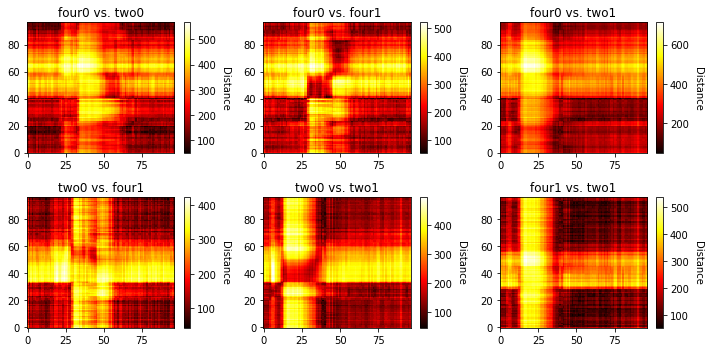

In [40]:
from scipy import spatial
fig = plt.figure()
subplot_num = 1
for i in range(0,4):
    for j in range(i+1,4):
        fig.add_subplot(2,3,subplot_num)
        subplot_num = subplot_num + 1
        mfcc1 = feature_matrix_list[i]
        mfcc2 = feature_matrix_list[j]
        dmatrix = spatial.distance_matrix(mfcc1, mfcc2)
        im = plt.imshow(dmatrix, aspect='auto', interpolation='none', cmap='hot', origin='lower')
        ax = fig.gca()
        plt.title(sample_names[i] + ' vs. ' + sample_names[j])
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel('Distance', rotation=-90, va="bottom");
fig.tight_layout()